Binary Categorization: Create a machine to detect between "Standard" English and AAVE

Imports

In [1]:
from typing import Iterator, Iterable, Tuple, Text, Union

import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import spmatrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd

NDArray = Union[np.ndarray, spmatrix]
#print ("happy")

Open data file, create tuples of (label,text) and lists of texts/labels

In [27]:
detectlanguage = open("aave_train.txt",encoding="utf16") 
bm = [] #the tuples
texts = [] #list of text
labels = [] #list of labels
for line in detectlanguage:
    eachline = line.split("\t", 1) #create list with label, text
    label = eachline[0] #pull the label
    text = eachline[1] #pull the text

    stripline = text.strip() #remove white space if nccessary

    r =([label, stripline.rstrip("\n")]) #create tuple and remove new line markers

    bm.append(r)
    labels.append(label)
    texts.append(stripline)


convert text to features

In [28]:
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=.8)    
vectorizer.fit_transform(texts)

<3021x1052 sparse matrix of type '<class 'numpy.int64'>'
	with 46731 stored elements in Compressed Sparse Row format>

Get the index of the feature - do not run unless you put your own feature in there!!!!!!!

In [29]:
vectorizer.vocabulary_.get('putthefeaturenamehere')

Turn those features into a matrix!!

In [30]:
features = vectorizer.transform(texts).toarray()
print (features.shape)

(3021, 1052)


texts --> labels init

In [31]:
le = preprocessing.LabelEncoder()
le.fit(labels)

LabelEncoder()

What are the labels?

In [32]:
list(le.classes_)

['AAVE', 'SAE']

Index of specific label

In [33]:
le.transform(labels)[0]

1

Creates a label vector

In [34]:
label2 = le.transform(labels)

Start the Logistic Regression

In [35]:
logreg = LogisticRegression(fit_intercept= True,class_weight= {0:3,1:9}, random_state = 0)

Train, baby, train!

In [36]:
logreg.fit(features, label2, sample_weight=None)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 3, 1: 9}, random_state=0)

Evaluating the Training

In [37]:
train_acc = logreg.score(features, label2)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 86.85865607414763


Preprocess the data for the prediction (test)

In [43]:
detectlanguage = open("aave_test.txt",encoding="utf16") 
texts1 = []
labelsone = []
for line in detectlanguage:
    eachline = line.split("\t", 1)
    label = eachline[0]
    text = eachline[1]
    stripline = text.strip()
    funtext = stripline.rstrip("\n")
    texts1.append(funtext)
    labelsone.append(label)
print (labelsone)

['SAE', 'AAVE', 'AAVE', 'SAE', 'SAE', 'SAE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'SAE', 'SAE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'SAE', 'SAE', 'SAE', 'SAE', 'AAVE', 'AAVE', 'AAVE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'AAVE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'AAVE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'AAVE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'SAE', 'AAVE', 'AAVE', '

create label vector for these

In [44]:
labels1 = le.transform(labelsone)

In [45]:
features1 = vectorizer.transform(texts1).toarray()
print (features1.shape)

(1017, 1052)


predict

In [46]:
predictions = logreg.predict(features1)
print (predictions)

[0 1 0 ... 0 1 1]


Confusion Matrix

In [47]:
cm = confusion_matrix(labels1, predictions)

In [48]:
TN, FP, FN, TP = confusion_matrix(labels1, predictions).ravel()

In [49]:
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  412
False Positive(FP) =  203
True Negative(TN)  =  306
False Negative(FN) =  96


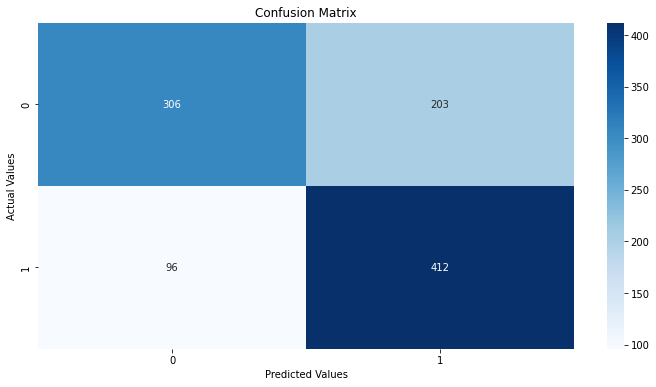

In [50]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [51]:
accuracy =  (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

Accuracy of the binary classification = 0.706


More Evaluations

In [52]:
test_acc = accuracy_score(labels1, predictions)

In [53]:
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 70.59980334316617


In [54]:
print(classification_report(labels1, predictions))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       509
           1       0.67      0.81      0.73       508

    accuracy                           0.71      1017
   macro avg       0.72      0.71      0.70      1017
weighted avg       0.72      0.71      0.70      1017

